### Solving CheckIO exercise: INSIDE BLOCK - Python 3 Version
###### A beginners view and guide


Our goal is:

---
To code a function that:

Given a tuple which contains n (x,y) pairs of coordinates representing the vertices of a polygon in a consecutive way, and a single (x,y) tuple representing the coordinates of a point in a 2D cartesian space:

__To determine whether the point is contained within the space of the polygon or not__

Thus, the value returned by our function must be: True, if the point lies within the polygon and False if it does not.

An exception applies: should the point be anywhere along the perimeter of the polygon, the function must return True

---

Input example:
```
polygon = ((1,1),(1,5),(5,5),(5,1))
point = (4,3)
```

As with most CheckIO exercises and real life problems, there is more than one approach to be taken. The one I used is based on the Ray Tracing method to find whether a point belongs to the area of a polygon or not. 
This method consist of tracing a ray that emanates from the query point in any direction (in my case, I projected the ray to the right) and count the number of times it crosses one of the polygon's edges. 

-If the number is odd: the point lies within the polygon
-If the number is even or zero: the point lies outside the polygon.

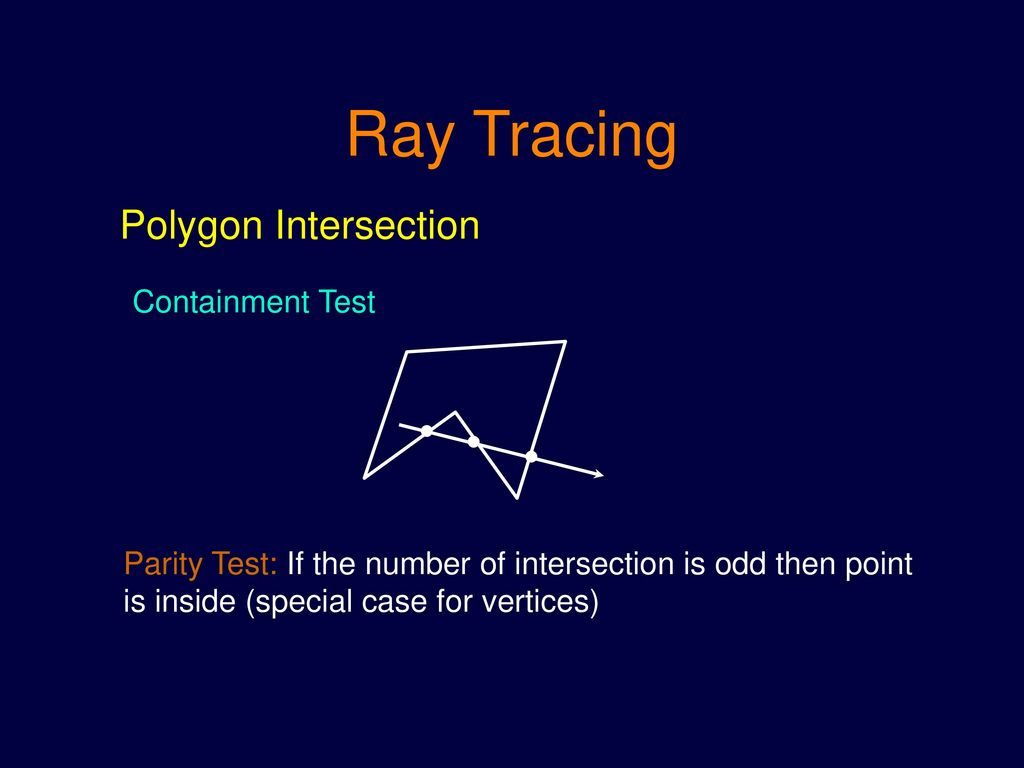

Before starting the ray tracing algorithm, there are some tests we may take to spare the function from running all the code: 

- Test 1: whether the query point lies outside the bounding box of the polygon. If that is True, the point cannot be inside the polygon.
- Test 2: whether the point falls in one of the vertices or edges of the polygon.

###### Code for Test 1:

In [ ]:
# first we check if the point is anywhere within the bounding box of the polygon:
    x_axis = [poly[x][0] for x,_ in enumerate(poly)]
    y_axis = [poly[y][1] for y,_ in enumerate(poly)]    
    if point[0] < min(x_axis) or point[0] > max(x_axis) or point[1] < min(y_axis) or point[1] > max(y_axis):
        return False


We can determine that the query point lies in one of the vertices if both the vertex and the query point have the same coordinates and that it lies in an edge if: being P our query point and A and B two consecutive vertices that create an edge of the poligon:

- Distance AB = Distance PA + Distance PB

###### Code for Test 2:


In [ ]:
# then we check wether the point is in one of the vertices or edges of the polygon
# we'll know if the point lies in one of the edges if the point is comprises between any two consecutive vertices of the polygon
# being P the Query Point and A, B two consecutive vertices: distance AB is close to distance PA + distance PB
    for vertex in poly:
        if vertex == point:
            return True
    
    for i, vertex in enumerate(poly):
        distance_point_vertex_1 = math.sqrt((point[0] - poly[i-1][0]) ** 2 + (point[1] - poly[i-1][1]) ** 2)
        distance_point_vertex_2 = math.sqrt((point[0] - poly[i][0]) ** 2 + (point[1] - poly[i][1]) ** 2)
        distance_2_vertices = math.sqrt((poly[i-1][0] - poly[i][0]) ** 2 + (poly[i-1][1] - poly[i][1]) ** 2)
        if math.isclose(distance_2_vertices, distance_point_vertex_1 + distance_point_vertex_2):
            return True


If none of the cases are enough to reach a function return, we must proceed with the ray tracing, for which we simply create a segment long enough to cross any polygon from the query point to the right(positive X-Axis).




In [ ]:
    ray_trace = ((point[0], point[1]), (1000, point[1]))

Now the core of the algorithm comes. The function must count with how many edges does the ray_trace segment intersect.
There are several ways to do so and, after some research, I chose one based on the cross product and the orientation of the vectors defined by the ray_trace segment and a given edge of the polygon. 

The theory the algorithm is based on is nicely explained by Chun-Ho Hung on Quora:
<https://www.quora.com/Given-four-Cartesian-coordinates-how-do-I-check-whether-these-two-segments-intersect-or-not-using-C-C++>

However, this function will only work to find the proper intersections as for the cases in which the ray_trace segment crosses the vertices I used an approach which I found more intuitive.

###### Code for Cross Products:

In [ ]:
def intersects(a, b):
    p = [b[0][0]-a[0][0], b[0][1]-a[0][1]]
    q = [a[1][0]-a[0][0], a[1][1]-a[0][1]]
    r = [b[1][0]-b[0][0], b[1][1]-b[0][1]]

    t = (q[1]*p[0] - q[0]*p[1])/(q[0]*r[1] - q[1]*r[0]) \
        if (q[0]*r[1] - q[1]*r[0]) != 0 \
        else (q[1]*p[0] - q[0]*p[1])
    u = (p[0] + t*r[0])/q[0] \
        if q[0] != 0 \
        else (p[1] + t*r[1])/q[1]

    return t >= 0 and t <= 1 and u >= 0 and u <= 1

To handle the times in which the ray_trace segment crosses a vertex, I divided vertices into two types:

- __X-Axis bouncing vertices:__ Do not need to be accounted for
- __X-Axis crossing vertices:__ Need to be accounted for

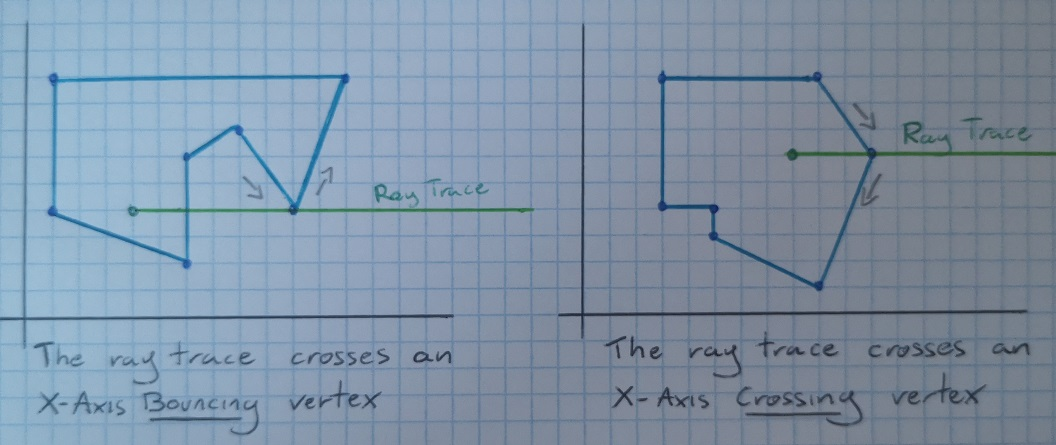

###### Code for the Axis Crossing Accounting:

In [ ]:
# However, some exceptions apply should the ray trace cross any vertices of the polygon
# We'll clasify vertices into x_axis-crossing vertices and x_axis bouncing vertices (this will help only in some extreme cases):
    list_poly = list(poly)
    first_vertex = poly[0]
    list_poly.append(first_vertex)
    vertex_check_poly = tuple(list_poly)
    vertex_types = []
    for i in range(len(poly)):
        if poly[i][1] < poly[i-1][1] and poly[i][1] < vertex_check_poly[i+1][1]\
        or poly[i][1] > poly[i-1][1] and poly[i][1] > vertex_check_poly[i+1][1]:
            vertex_types.append('bounce')
        else:
            vertex_types.append('cross')
        
# Now we make the Ray Tracing projection from the query point, to the right:
    ray_trace = ((point[0], point[1]), (1000, point[1]))
# First we count how many vertices does the Ray Trace cross, if any: cross-type vertices count 1 and bounce-types, 2
    vertices_crossed_value = 0
    for i, vertex in enumerate(poly):
        if poly[i][0] > point[0] and poly[i][1] == point[1]:
            vertices_crossed_value += 1 if vertex_types[i] == 'cross' else 0


###### Finally, the code for the whole solution:

In [ ]:
import math

def intersects(a, b):
    p = [b[0][0]-a[0][0], b[0][1]-a[0][1]]
    q = [a[1][0]-a[0][0], a[1][1]-a[0][1]]
    r = [b[1][0]-b[0][0], b[1][1]-b[0][1]]

    t = (q[1]*p[0] - q[0]*p[1])/(q[0]*r[1] - q[1]*r[0]) \
        if (q[0]*r[1] - q[1]*r[0]) != 0 \
        else (q[1]*p[0] - q[0]*p[1])
    u = (p[0] + t*r[0])/q[0] \
        if q[0] != 0 \
        else (p[1] + t*r[1])/q[1]

    return t >= 0 and t <= 1 and u >= 0 and u <= 1


def is_inside(poly, point):    
    
# first we check if the point is anywhere within the rectangle that circumscribes the polygon
    x_axis = [poly[x][0] for x,_ in enumerate(poly)]
    y_axis = [poly[y][1] for y,_ in enumerate(poly)]    
    if point[0] < min(x_axis) or point[0] > max(x_axis) or point[1] < min(y_axis) or point[1] > max(y_axis):
        return False
# then we check wether the point is in one of the vertices or edges of the polygon
# we'll know if the point lies in one of the edges if the point is comprises between any two consecutive vertices of the polygon
# being P the Query Point and A, B two consecutive vertices: distance AB is close to distance PA + distance PB
    for vertex in poly:
        if vertex == point:
            return True
    
    for i, vertex in enumerate(poly):
        distance_point_vertex_1 = math.sqrt((point[0] - poly[i-1][0]) ** 2 + (point[1] - poly[i-1][1]) ** 2)
        distance_point_vertex_2 = math.sqrt((point[0] - poly[i][0]) ** 2 + (point[1] - poly[i][1]) ** 2)
        distance_2_vertices = math.sqrt((poly[i-1][0] - poly[i][0]) ** 2 + (poly[i-1][1] - poly[i][1]) ** 2)
        if math.isclose(distance_2_vertices, distance_point_vertex_1 + distance_point_vertex_2):
            return True
# Now we'll apply the Ray Tracing method: based on counting how many edges does the segment projected from the point to the right
    edges_crossed = 0
# However, some exceptions apply should the ray trace cross any vertices of the polygon
# We'll clasify vertices into x_axis-crossing vertices and x_axis bouncing vertices (this will help only in some extreme cases):
    list_poly = list(poly)
    first_vertex = poly[0]
    list_poly.append(first_vertex)
    vertex_check_poly = tuple(list_poly)
    vertex_types = []
    for i in range(len(poly)):
        if poly[i][1] < poly[i-1][1] and poly[i][1] < vertex_check_poly[i+1][1]\
        or poly[i][1] > poly[i-1][1] and poly[i][1] > vertex_check_poly[i+1][1]:
            vertex_types.append('bounce')
        else:
            vertex_types.append('cross')
        
# Now we make the Ray Tracing projection from the query point, to the right:
    ray_trace = ((point[0], point[1]), (1000, point[1]))
# First we count how many vertices does the Ray Trace cross, if any: cross-type vertices count 1 and bounce-types, 2
    vertices_crossed_value = 0
    for i, vertex in enumerate(poly):
        if poly[i][0] > point[0] and poly[i][1] == point[1]:
            vertices_crossed_value += 1 if vertex_types[i] == 'cross' else 0
# Finally, we count the number of edges the ray trace crosses.
    for i in range(len(poly)):
        a = ray_trace
        b = ((poly[i-1], poly[i]))
        if intersects(a, b):
            edges_crossed += 1
    return True if (edges_crossed + vertices_crossed_value) & 1 else False   